# Module 2: Appreciating, Interpreting and Visualizing Data
## Lab 4: t-Distributed Stochastic Neighbor Embedding (t-SNE)


```
Coordinator: Aswin Jose
```

---



This lab will be based upon t-SNE which is a dimensionality reduction algorithm used to visualize high dimensional datasets.

t-SNE stands for t-Distributed Stochastic Neighbor Embedding. It is an unsupervised, non-linear technique primarily used for data exploration and visualizing high-dimensional data. It was developed by Laurens van der Maatens and Geoffrey Hinton in 2008 (Link to the paper: https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)

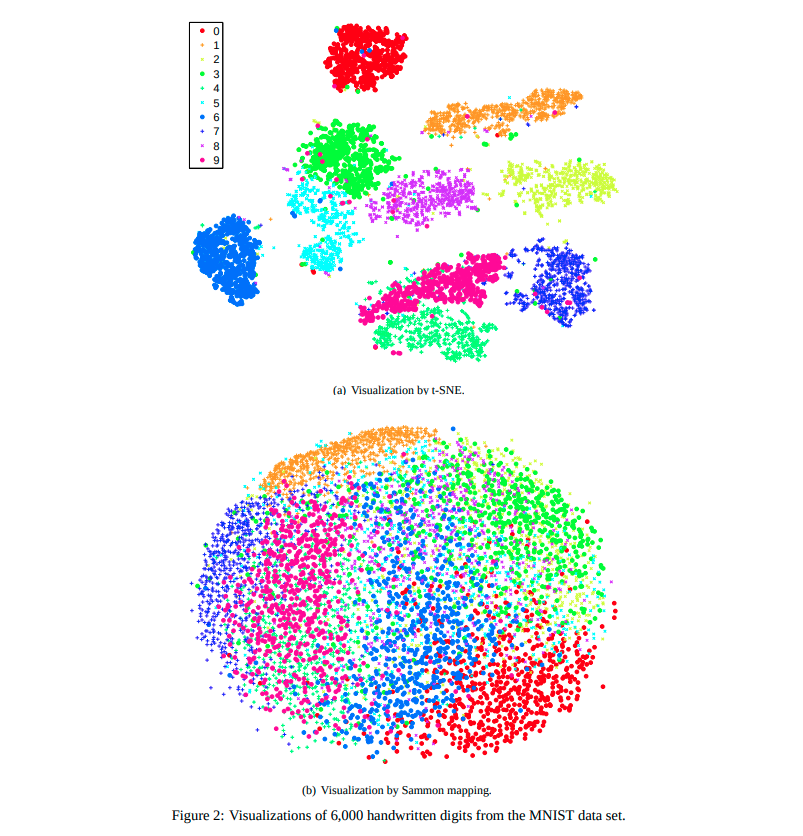

t-SNE has a tuneable parameter, **perplexity** which balances attention between the local and global aspects of your data. It is a guess about the number of close neighbors each point has. The perplexity value has a complex effect on the resulting pictures. The original paper says, “The performance of t-SNE is fairly robust to changes in the perplexity, and typical values are between 5 and 50.” But the story is more nuanced than that. Getting the most from t-SNE may mean analyzing multiple plots with different perplexities.

Also the t-SNE algorithm doesn’t always produce similar output on successive runs as there are additional hyperparameters related to the optimization process.

### HOW DOES T-SNE WORK??

The t-SNE algorithm calculates a similarity measure between pairs of instances in the high dimensional space and in the low dimensional space. It then tries to optimize these two similarity measures using a cost function. Let’s break that down into 3 basic steps.

1. Measure similarities between points in the high dimensional space. Think of a bunch of data points scattered on a 2D space. For each data point (xi) we’ll center a Gaussian distribution over that point. Then we measure the density of all points (xj) under that Gaussian distribution. Then renormalize for all points. This gives us a set of probabilities (Pij) for all points. Those probabilities are proportional to the similarities. All that means is, if data points x1 and x2 have equal values under this gaussian circle then their proportions and similarities are equal and hence you have local similarities in the structure of this high-dimensional space. The Gaussian distribution or circle can be manipulated using what’s called perplexity, which influences the variance of the distribution (circle size) and essentially the number of nearest neighbors.

2. This step is similar to step 1, but instead of using a Gaussian distribution we use a Student t-distribution with one degree of freedom, which is also known as the Cauchy distribution (See fig below). This gives us a second set of probabilities (Qij) in the low dimensional space. As you can see the Student t-distribution has heavier tails than the normal distribution. The heavy tails allow for better modeling of far apart distances.

3. The last step is that we want these set of probabilities from the low-dimensional space (Qij) to reflect those of the high dimensional space (Pij) as best as possible. We want the two map structures to be similar. We measure the difference between the probability distributions of the two-dimensional spaces using Kullback-Liebler divergence (KL). Finally, we use gradient descent to minimize our KL cost function.

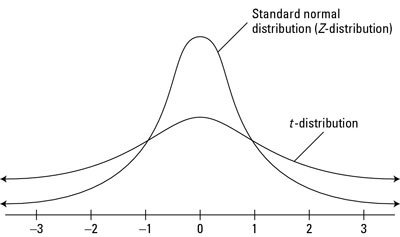

Scikit-learn has an implementation of t-SNE available which provides a wide variety of tuning parameters for t-SNE, and the most notable ones are:

1. n_components (default: 2): Dimension of the embedded space.
2. perplexity (default: 30): The perplexity is related to the number of nearest neighbors that are used in other manifold learning algorithms. Consider selecting a value between 5 and 50.
3. n_iter (default: 1000): Maximum number of iterations for the optimization. Should be at least 250.
4. method (default: ‘barnes_hut’): Barnes-Hut approximation runs in O(NlogN) time. method=’exact’ will run on the slower, but exact, algorithm in O(N^2) time.

In [ ]:
# numpy.
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# Random state.
RS = 20150101

# matplotlib.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# seaborn.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

1797 images each of size 8 x 8 loaded using load_digits()

In [ ]:
digits = load_digits()
digits.data.shape

(1797, 64)

Printing some images from the dataset

---



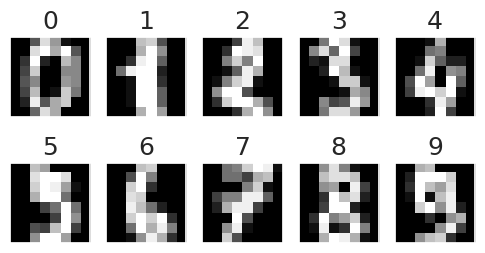

In [ ]:
nrows, ncols = 2, 5
plt.figure(figsize=(6,3))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(digits.target[i])

In [ ]:
# We first reorder the data points according to the handwritten numbers.
X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])

## Now using TSNE to fit the dataset with the default values.


1. n_components : 2
2. perplexity : 30
3. n_iter : 1000
4. method : ‘barnes_hut’


---



In [ ]:
digits_proj = TSNE(init="pca", random_state=RS).fit_transform(X)

#### Visualizing the data in the projected space

---



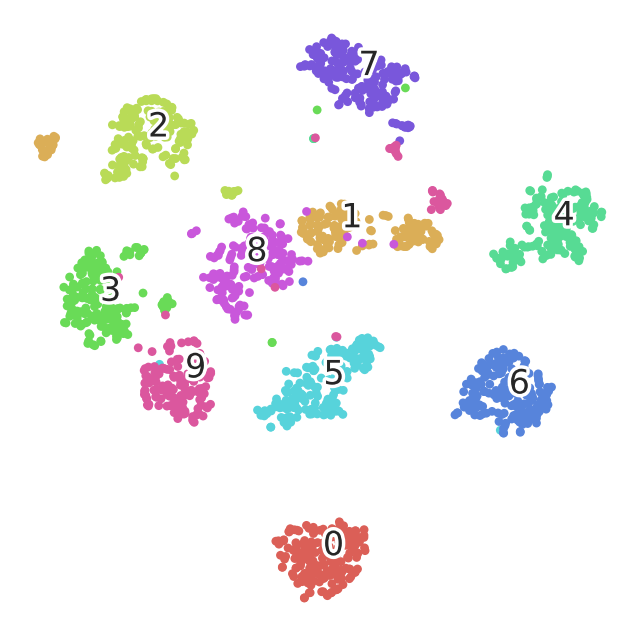

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7f09a84b4ee0>)

In [ ]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    plt.show()

    return f, ax, sc

scatter(digits_proj, y)

# Tweaking some of the hyperparameters to better understand their role

---

### Changing the PERPLEXITY values


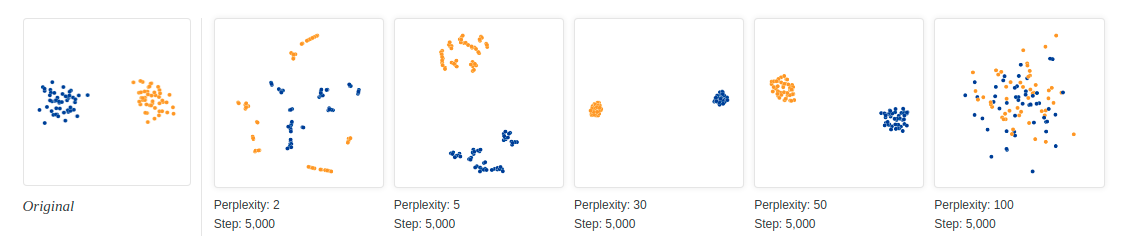

With perplexity values in the range (5 - 50) suggested by van der Maaten & Hinton, the diagrams do show these clusters, although with very different shapes. Outside that range, things get a little weird. With perplexity 2, local variations dominate. The image for perplexity 100, with merged clusters, illustrates a pitfall: for the algorithm to operate properly, the perplexity really should be smaller than the number of points. Implementations can give unexpected behavior otherwise.



---


1. n_components : 2
2. perplexity : **5**
3. n_iter : 1000
4. method : ‘barnes_hut’


---

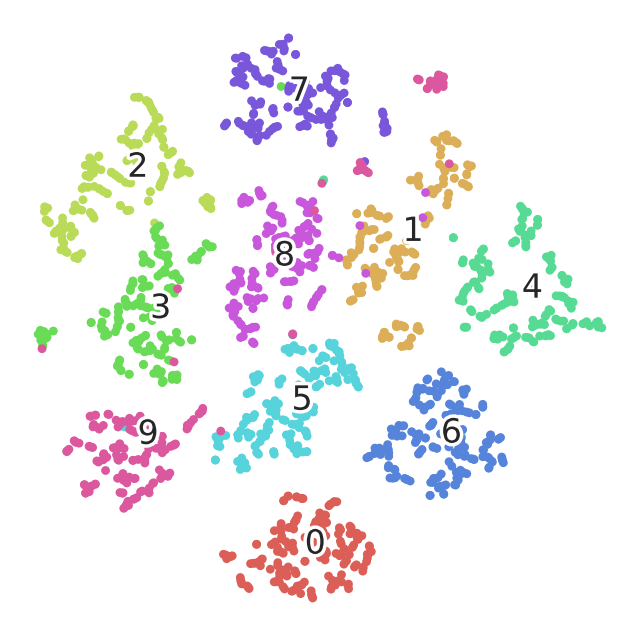

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7f09a84b6fb0>)

In [ ]:
digits_proj = TSNE(init="pca", random_state=RS, perplexity=5).fit_transform(X)

scatter(digits_proj, y)

We can see that there are local clusters within the same number group as well. This is happening as the perplexity being at 5, allows the local neighbourhood to dominate. Let us now see what happens if we increase the perplexity to 100, thereby increasing global impact.





---


1. n_components : 2
2. perplexity : **100**
3. n_iter : 1000
4. method : ‘barnes_hut’


---

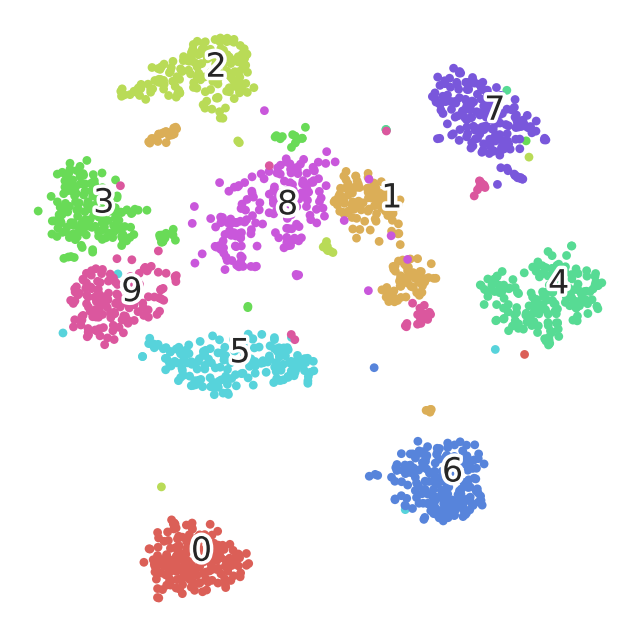

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7f09a43d8220>)

In [ ]:
digits_proj = TSNE(init="pca", random_state=RS, perplexity=100).fit_transform(X)

scatter(digits_proj, y)

The general structure of the plot remained similar to the one with perplexity = 30 (default), but on careful observation you can observe many data points not being part of the group they are supposed to be in. This is because of the large number of points considered for the neighbourhood (as perplexity value = 100 is higher), thereby allowing 2 data points from different groups to end up closer.



---

### Changing the NUMBER OF ITERATIONS

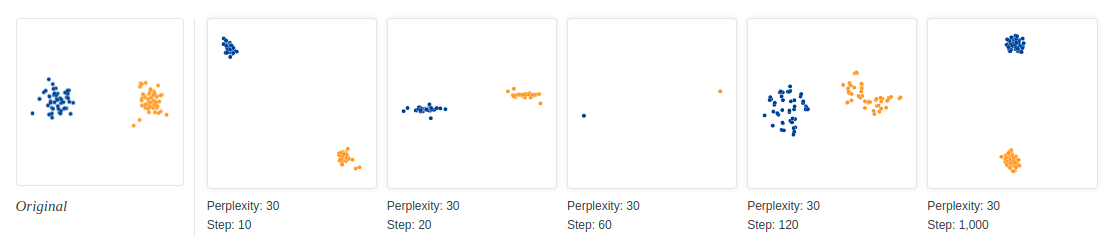

The images above show five different runs at perplexity 30. The first four were stopped before stability. After 10, 20, 60, and 120 steps you can see layouts with seeming 1-dimensional and even pointlike images of the clusters. If you see a t-SNE plot with strange “pinched” shapes, chances are the process was stopped too early. Unfortunately, there’s no fixed number of steps that yields a stable result. Different data sets can require different numbers of iterations to converge.

The most important thing is to iterate until reaching a stable configuration.





---


1. n_components : 2
2. perplexity : 30
3. n_iter : **250**
4. method : ‘barnes_hut’


---

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


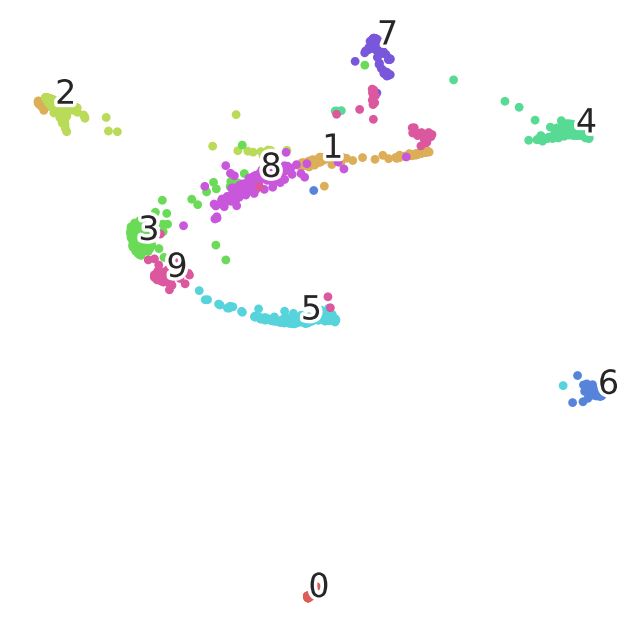

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7f09a2a5ace0>)

In [ ]:
digits_proj = TSNE(init="pca", random_state=RS, n_iter=250).fit_transform(X)

scatter(digits_proj, y)

As can be seen from the figure above, stopping the optimization earlier (in 250 iterations) resulted in a suboptimal clustering of the groups.

Let us now see how the results are affected if t-SNE is run for larger number of iterations


---


1. n_components : 2
2. perplexity : 30
3. n_iter : **5000**
4. method : ‘barnes_hut’


---

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


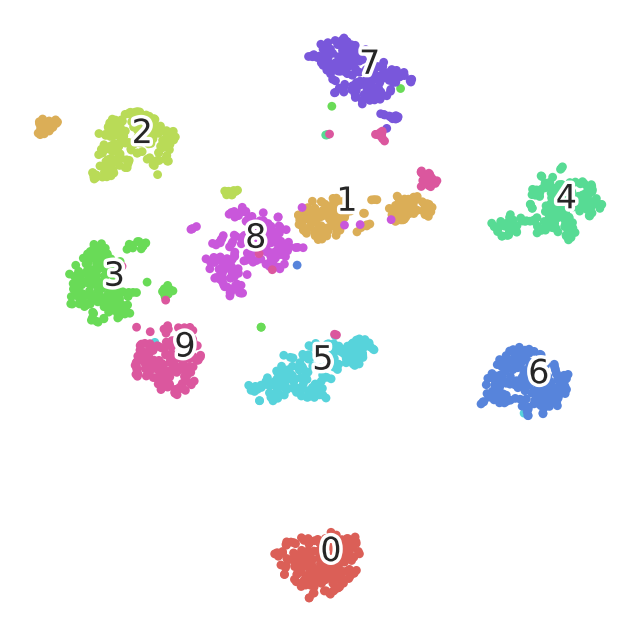

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7f09a2ae6ef0>)

In [ ]:
digits_proj = TSNE(init="pca", random_state=RS, n_iter=5000).fit_transform(X)

scatter(digits_proj, y)

Running for larger number of iterations more or less resulted in the same plot as the optimization had nearly converged till the default 1000 iterations. However the density of the clusters has increased.

---

### Changing the method to EXACT

The barnes-hut method takes O(NlogN) time, whereas the exact method takes O(N^2) time. Notice the increase in the execution time while running the cell below.


---

1. n_components : 2
2. perplexity : 30
3. n_iter : 1000
4. method : **‘exact’**


---

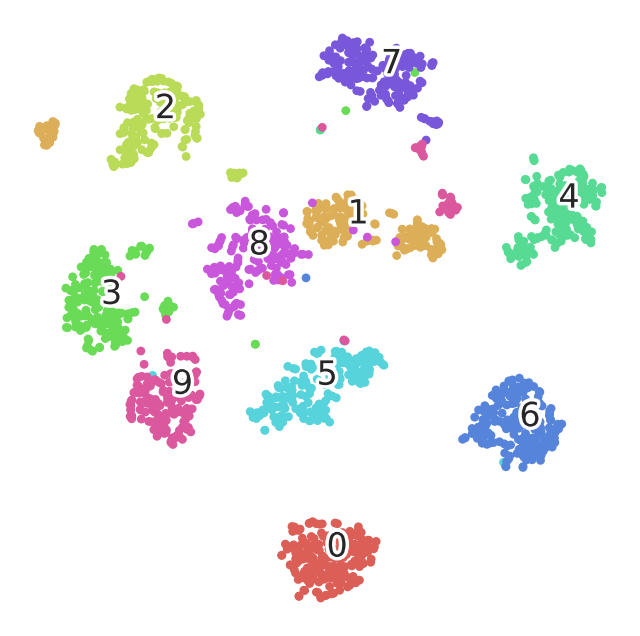

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7f09a297c0d0>)

In [ ]:
digits_proj = TSNE(init="pca", random_state=RS, method='exact').fit_transform(X)

scatter(digits_proj, y)

## EXERCISE

---



Try out different perplexity and iteration values to better appreciate the concepts taught.

You can modify the code in the cell below to check the resultant plots.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


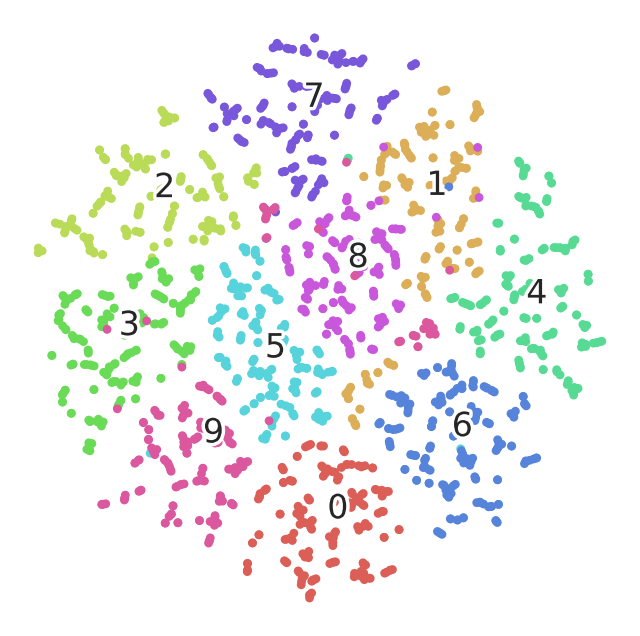

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7f09a29a1ab0>)

In [ ]:
###############################################################
###### MODIFY THE VALUES FOR THE HYPERPARAMETERS BELOW ########

perplexity_value = 2
number_iterations = 1000
method = "barnes_hut"

###############################################################

digits_proj = TSNE(init="pca", random_state=RS, n_iter=number_iterations, perplexity=perplexity_value, method=method).fit_transform(X)
scatter(digits_proj, y)



---

## Exercise:

1. Now that you understand t-SNE a bit better, can you point out some differences between PCA and t-SNE. What are the advantages/disadvantages of one over the other?
PCA (Principal Component Analysis) and t-SNE (t-Distributed Stochastic Neighbor Embedding) are both dimensionality reduction techniques, but they are designed for different purposes and work quite differently. Below are some of the key differences and advantages/disadvantages of each:

1. Objective:

PCA: A linear technique that tries to preserve global structures by finding new axes (principal components) that maximize the variance in the data.

t-SNE: A non-linear technique focused on preserving the local structure, i.e., the pairwise similarity between data points, particularly for visualization in 2D or 3D.


2. Data Transformation:

PCA: Projects the data linearly onto a lower-dimensional subspace. It's effective when the data has a strong global structure.

t-SNE: Uses probabilities to represent similarities between points and projects data non-linearly. This allows t-SNE to capture complex structures like clusters that PCA may miss.


3. Interpretability:

PCA: The axes (principal components) are linear combinations of the original features, which can be interpreted. You can often explain the new components in terms of the original features.

t-SNE: The output is purely a visualization tool, and the axes in the reduced dimension do not have any interpretability or relationship with the original features.


4. Preserving Structure:

PCA: Focuses on preserving global structure (variance) across the whole dataset but can lose fine-grained local details (like clusters).

t-SNE: Prioritizes preserving local relationships (i.e., nearby points in high-dimensional space remain close in lower dimensions) but may distort global relationships (e.g., distances between clusters).


5. Complexity and Computation Time:

PCA: Much faster and computationally inexpensive, especially for large datasets, since it's based on eigen-decomposition or singular value decomposition (SVD).

t-SNE: Computationally expensive, particularly for large datasets, since it calculates pairwise similarities. It doesn't scale well to very large datasets.


6. Dimensionality:

PCA: Can reduce to any number of dimensions (including more than 2 or 3).

t-SNE: Primarily used for 2D or 3D visualizations. It is not generally used for reducing to more than 3 dimensions.


7. Suitability:

PCA: Better when the data has a global linear structure and the focus is on reducing dimensions while maintaining explainability.

t-SNE: Better for visualization when you want to explore local structures like clusters. It is especially popular for high-dimensional, non-linear data (e.g., images, text embeddings).


Advantages/Disadvantages:

PCA Advantages:

Computationally efficient and scalable to large datasets.

Produces interpretable components.

Good for preserving global structure.


PCA Disadvantages:

Poor at preserving local structures (e.g., clusters may not be well separated).

Limited to linear relationships.


t-SNE Advantages:

Excellent at revealing local structures and clusters.

Works well with non-linear data.


t-SNE Disadvantages:

Computationally expensive, slow on large datasets.

Does not preserve global structures well.

Non-interpretable axes.

Sensitive to hyperparameters like perplexity, and results can vary across runs.


In summary:

Use PCA when you care about interpretability and capturing overall variance.

Use t-SNE for visualizing clusters and local relationships in complex, non-linear datasets.


Would you like a deeper dive into any of these aspects, such as practical tips for using t-SNE?




>##### Pointers:

> a. Which of the two algorithms is linear and which one is non-linear?
PCA (Principal Component Analysis) is a linear algorithm. It reduces dimensionality by projecting the data onto a lower-dimensional subspace using linear transformations (linear combinations of the original features).

t-SNE (t-Distributed Stochastic Neighbor Embedding) is a non-linear algorithm. It focuses on preserving local structures in high-dimensional data using non-linear transformations and pairwise similarities.


In short:

PCA = Linear

t-SNE = Non-linear


   
b. How does the non-linearity in one of these two algorithms help in capturing certain data sets?
The non-linearity in t-SNE helps it capture complex, non-linear relationships in datasets that are not well-represented by linear methods like PCA. Here's how the non-linearity in t-SNE benefits the algorithm:

1. Capturing Non-Linear Structures:

Many real-world datasets (e.g., images, text, biological data) have intricate patterns and structures that cannot be captured by simple linear relationships. t-SNE’s non-linearity allows it to preserve local neighborhoods by modeling how data points are related in a high-dimensional space, even if those relationships are non-linear.

For example:

In a dataset where data points form clusters that are curved or spiraled, a linear algorithm like PCA would struggle to separate these points because it assumes straight-line relationships.

t-SNE, by contrast, can handle non-linear clusters, maintaining the proximity of similar points and separating dissimilar ones effectively, even if those clusters are shaped in a complex way.


2. Revealing Hidden Clusters:

In datasets with complex underlying groupings, t-SNE excels at revealing hidden clusters or patterns that linear techniques may miss. It does so by focusing on preserving the local relationships between data points, rather than globally optimizing variance. This helps in distinguishing clusters that are close together but separated by non-linear boundaries.

3. Mapping High-Dimensional Data to Low Dimensions:

High-dimensional datasets (e.g., word embeddings, gene expression data) often have highly non-linear structures. t-SNE, with its non-linear transformations, is better suited for compressing such high-dimensional spaces into 2D or 3D visualizations without distorting the local relationships too much.

For example, when working with word embeddings, words with similar meanings often form clusters in high-dimensional space. These clusters are not necessarily linearly separable, so t-SNE can project these into a lower dimension while preserving those relationships, whereas PCA might merge or distort them.

4. Local vs Global Focus:

Because t-SNE emphasizes local structure (pairwise similarities between neighboring points), it is less concerned with maintaining global relationships. This allows it to distort large-scale patterns (e.g., distances between clusters) but preserves fine-grained, local clusters, which is often critical when exploring datasets for groupings or patterns. This non-linearity gives t-SNE an edge in applications like image or document clustering, where the local similarities matter more than the global shape of the data.

Summary:

The non-linearity in t-SNE is what makes it particularly effective for:

Capturing non-linear relationships between points

Revealing hidden or complex clusters in the data

Providing meaningful low-dimensional visualizations of high-dimensional data with complex structures


In contrast, PCA, being a linear method, is limited in its ability to capture such non-linear patterns.

    
c. PCA is known to keep points which were further apart in the higher dimension, far apart in the lower dimension as well. Does t-SNE do the same? Or does it try to preserve local neighbourhood?  
t-SNE primarily focuses on preserving local neighborhoods rather than maintaining global distances. It does not aim to keep points that were far apart in the higher-dimensional space far apart in the lower-dimensional space. Instead, t-SNE emphasizes the local structure by ensuring that points that were close to each other in the original space remain close in the lower-dimensional embedding.

Differences in how t-SNE and PCA handle distances:

PCA: As a linear method, PCA tries to preserve the global structure, which includes both local relationships and the relative distances between points that are far apart. If two points are far apart in the high-dimensional space, PCA will often keep them far apart in the lower-dimensional space. PCA reduces dimensionality while attempting to maintain as much of the variance (global information) as possible, which tends to keep points that are distant in high dimensions also distant in the projection.

t-SNE: In contrast, t-SNE is focused on maintaining the local structure of the data, meaning that it preserves the relationships between nearby points. However, t-SNE may distort the global structure. It often compresses or stretches distances between clusters, making points that were far apart in high-dimensional space appear closer or farther in the lower-dimensional representation, depending on how the algorithm interprets their relationship to other points.


For example:

Points within the same cluster will remain close to each other after t-SNE projects them into lower dimensions, as t-SNE seeks to preserve those local neighborhoods.

Points from different clusters that were far apart in the high-dimensional space may not remain far apart in the low-dimensional space, because t-SNE does not prioritize global distance preservation.


Summary:

t-SNE preserves local neighborhoods (similar points stay close), but does not maintain global distances.

PCA preserves global structure, including the relative distances between far-apart points, while potentially losing finer local details like clusters.


This makes t-SNE excellent for visualizing clusters and local relationships but less suited for tasks where preserving the global geometry of the dataset is crucial.

  
d. Can you comment on which one of the two is computationally more expensive?
t-SNE is computationally more expensive than PCA. Here's why:

1. Computational Complexity:

PCA: PCA has a computational complexity of approximately O(d^2 * n), where d is the number of dimensions (features), and n is the number of data points. This is because PCA involves computing the covariance matrix and performing an eigen-decomposition or Singular Value Decomposition (SVD). PCA is generally quite fast, especially for datasets with fewer dimensions, and can handle large datasets efficiently.

t-SNE: t-SNE has a complexity of O(n^2) or worse due to the pairwise distance calculations it performs between data points to estimate similarities. This quadratic scaling makes t-SNE much slower as the number of data points increases. The non-linear optimization process also involves several iterations (gradient descent), which adds to the computational burden. Even with modern optimizations (like Barnes-Hut t-SNE), the algorithm still tends to be much slower than PCA.


2. Scalability:

PCA: Can handle large datasets effectively because its computational cost scales more favorably with both the number of dimensions and the number of points. It is widely used for datasets with thousands or even millions of data points.

t-SNE: t-SNE struggles with large datasets due to its pairwise distance calculations. For very large datasets (e.g., tens or hundreds of thousands of points), t-SNE can become impractical without specialized optimizations or sampling techniques.


3. Use Case in Practice:

PCA is often used in situations where fast dimensionality reduction is needed, especially for high-dimensional datasets, because it runs quickly and scales well.

t-SNE, while powerful for visualizing clusters and local structures, is reserved for smaller datasets or specific parts of larger datasets (like sample subsets), due to its high computational cost.


Summary:

PCA is computationally less expensive and scales better to large datasets.

t-SNE is more computationally expensive due to its pairwise similarity calculations and non-linear optimization.




2. How does the computational complexity and runtime of t-SNE scale with dataset size and dimensionality?
The computational complexity and runtime of t-SNE are significantly impacted by both the dataset size (n) and the dimensionality (d). Let's break down how they scale:

1. Scaling with Dataset Size (n):

t-SNE computes pairwise similarities between all points in the dataset, which directly influences its complexity.

Computational Complexity: t-SNE's complexity scales as O(n²), where n is the number of data points.

This quadratic scaling arises because the algorithm computes a distance or similarity between every pair of data points. Specifically, t-SNE models pairwise probabilities in both the original high-dimensional space and the low-dimensional space, requiring pairwise distance calculations.

Implication: As the number of data points increases, the number of pairwise interactions increases dramatically. For example:

For 10,000 points, t-SNE needs to compute 100,000,000 pairwise interactions.

For 100,000 points, it needs to compute 10,000,000,000 interactions.


This quadratic growth makes t-SNE computationally prohibitive for large datasets without special optimizations like Barnes-Hut approximations or FIt-SNE (Fast t-SNE), which attempt to reduce the complexity to approximately O(n log n). These optimizations, however, still struggle with very large datasets (e.g., millions of points).


2. Scaling with Dimensionality (d):

Although t-SNE is more sensitive to the number of data points than to dimensionality, higher dimensionality also affects its performance.

Complexity in Dimensionality: The cost of computing pairwise distances in the high-dimensional space scales with the dimensionality d. Calculating the distance between two points in d dimensions has a cost of O(d).

Thus, the complexity of t-SNE also scales as O(d * n²) (for the original t-SNE implementation). The higher the dimensionality, the more costly it becomes to compute the initial pairwise distances between points. However, the impact of increasing dimensionality is generally less severe than increasing dataset size n.

Impact on Runtime: As dimensionality increases, the runtime increases because more calculations are required to determine the distances between points. This has a greater effect during the initial stages of the algorithm when high-dimensional distances are calculated.


3. Practical Impact:

Small Dataset, Low Dimensions (e.g., n < 1,000, d < 100): t-SNE can perform reasonably well, completing within seconds to minutes on most modern machines.

Larger Dataset, Moderate Dimensions (e.g., n ≈ 10,000, d ≈ 100): t-SNE will be slower, often taking minutes to hours depending on the optimizations used (like Barnes-Hut). Without these optimizations, the quadratic scaling in n can cause substantial delays.

Very Large Datasets (e.g., n > 100,000): Even with dimensionality around 100, t-SNE can become prohibitively slow due to the O(n²) scaling. Special techniques like downsampling (processing a representative subset of the data) or using faster implementations (e.g., FIt-SNE or openTSNE) become necessary for handling larger datasets.


Optimizations to Improve Scalability:

Barnes-Hut t-SNE: Reduces the complexity to O(n log n) by approximating the pairwise similarity calculations using a quad-tree method. It significantly speeds up t-SNE for larger datasets, though it still may not work well for extremely large datasets.

FIt-SNE: Further improves runtime using interpolation-based techniques and a faster kernel method for distance calculations, making it feasible to run t-SNE on datasets with over a million points.

openTSNE: Another optimized version of t-SNE that leverages improvements like parallelization and more efficient distance computation to handle larger datasets faster.


Summary:

Dataset size (n): t-SNE scales quadratically (O(n²)), making it slow for large datasets. The number of data points has the greatest impact on t-SNE’s runtime.

Dimensionality (d): While t-SNE's performance is also affected by dimensionality (O(d) per distance computation), it is not as sensitive to d as it is to n. However, very high-dimensional data will slow down the distance calculations.

Optimizations: Techniques like Barnes-Hut, FIt-SNE, and openTSNE can help reduce the computational burden, but t-SNE remains more computationally expensive than PCA or other dimensionality reduction techniques for large datasets.




3. What are some limitations or potential pitfalls to be aware of when using t-SNE? (tell atleast 3)
While t-SNE is a powerful tool for visualizing high-dimensional data, it has several limitations and potential pitfalls to be aware of:

1. Poor Global Structure Preservation:

Issue: t-SNE is designed to preserve local structure (relationships between nearby points) at the expense of the global structure (distances between far-apart points).

Pitfall: This means that while t-SNE may successfully show clusters and their local relationships, it often distorts the global distances between clusters, making it difficult to interpret large-scale relationships in the data. For instance, clusters that appear close together in the t-SNE visualization may not actually be similar in the original high-dimensional space.


2. High Sensitivity to Hyperparameters:

Issue: t-SNE relies on several hyperparameters, particularly perplexity (which controls the balance between local and global structure) and the number of iterations in the optimization process.

Pitfall: Small changes in these hyperparameters can lead to vastly different visualizations, making it difficult to interpret the results. For example, selecting the wrong perplexity value can lead to misleading clusters, or cause overfitting or underfitting of the local structure. There's no one-size-fits-all perplexity value, so it requires experimentation and domain knowledge.


3. Computationally Expensive and Slow:

Issue: t-SNE has a time complexity of O(n²), meaning it is computationally expensive, especially for large datasets (thousands to millions of data points).

Pitfall: Due to its high computational cost, t-SNE can become impractical for large datasets without optimizations like Barnes-Hut t-SNE or FIt-SNE. Even with these optimizations, it may still take a long time to run. This limits its usability for real-time applications or exploration of very large datasets.


4. Non-Deterministic Results:

Issue: t-SNE uses random initialization and stochastic optimization (gradient descent), so the results can vary slightly between different runs, even with the same parameters.

Pitfall: This non-determinism can lead to inconsistency in the visualizations, which complicates the interpretation, especially when comparing different runs or exploring data over time. To mitigate this, you can fix the random seed, but this does not guarantee identical results across all systems or implementations.


5. Not Scalable for More than 2D or 3D:

Issue: t-SNE is most commonly used for projecting high-dimensional data into 2D or 3D for visualization.

Pitfall: It is not well-suited for dimensionality reduction to more than three dimensions. Therefore, while it is excellent for visualization purposes, it is less practical as a general dimensionality reduction tool for tasks like clustering, classification, or regression that require more than three dimensions.


6. Difficult to Interpret Quantitatively:

Issue: t-SNE produces embeddings where the axes don't have any inherent meaning—they are not linear combinations of the original



---
 ## Some interesting references:

 1. https://blog.paperspace.com/dimension-reduction-with-t-sne/
 2. https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1
 3. https://distill.pub/2016/misread-tsne/



---


